In [4]:
import numpy as np 
import pandas as pd
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import norm
from collections import Counter                      
import matplotlib.pyplot as plt             
%matplotlib inline    
%config IPCompleter.greedy=True
sns.set(color_codes=True)

import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv(r"C:\Users\chris\OneDrive\Desktop\ML Project.csv")
df

,State,State Code,Pregnancy-associated Hypertension,Pregnancy-associated Hypertension Code,Delivery Method,Delivery Method Code,Diabetes,Diabetes Code,Eclampsia,Eclampsia Code,Births,% of Total Births,Average Birth Weight,Standard Deviation for Average Birth Weight,Average Age of Mother,Standard Deviation for Average Age of Mother,Unnamed: 16,Standard Deviation for Average LMP Gestational Age,Unnamed: 18,Prediction for Gestation Term
0,Alabama,1,Yes,1,Vaginal,1,Yes,1,Yes,1,72,0.00%,3041.93,586.48,28.82,6.04,37.64,2.21,NaN,Full-Term
1,Alabama,1,Yes,1,Vaginal,1,Yes,1,No,2,2121,0.01%,3138.58,597.18,29.08,5.75,37.40,2.44,NaN,Early-Term
2,Alabama,1,Yes,1,Vaginal,1,No,2,Yes,1,725,0.00%,2923.30,626.72,26.12,5.43,37.46,2.77,NaN,Early-Term
3,Alabama,1,Yes,1,Vaginal,1,No,2,No,2,21091,0.05%,3050.41,550.63,26.82,5.63,37.71,2.39,NaN,Full-Term
4,Alabama,1,Yes,1,Cesarean,2,Yes,1,Yes,1,117,0.00%,2942.53,763.12,30.03,5.73,36.06,3.01,NaN,Early-Term
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,Wyoming,56,No,2,Vaginal,1,No,2,No,2,46273,0.12%,3231.01,498.07,27.18,5.46,38.84,2.14,NaN,Late Term
993,Wyoming,56,No,2,Cesarean,2,Yes,1,Yes,1,34,0.00%,2830.38,792.35,31.74,6.33,35.44,2.50,NaN,Early-Term
994,Wyoming,56,No,2,Cesarean,2,Yes,1,No,2,1201,0.00%,3217.71,732.99,30.58,5.64,37.81,2.64,NaN,Full-Term
995,Wyoming,56,No,2,Cesarean,2,No,2,Yes,1,148,0.00%,2552.83,795.92,27.89,6.12,35.97,3.57,NaN,Early-Term


In [7]:
df.head()

,State,State Code,Pregnancy-associated Hypertension,Pregnancy-associated Hypertension Code,Delivery Method,Delivery Method Code,Diabetes,Diabetes Code,Eclampsia,Eclampsia Code,Births,% of Total Births,Average Birth Weight,Standard Deviation for Average Birth Weight,Average Age of Mother,Standard Deviation for Average Age of Mother,Unnamed: 16,Standard Deviation for Average LMP Gestational Age,Unnamed: 18,Prediction for Gestation Term
0,Alabama,1,Yes,1,Vaginal,1,Yes,1,Yes,1,72,0.00%,3041.93,586.48,28.82,6.04,37.64,2.21,NaN,Full-Term
1,Alabama,1,Yes,1,Vaginal,1,Yes,1,No,2,2121,0.01%,3138.58,597.18,29.08,5.75,37.40,2.44,NaN,Early-Term
2,Alabama,1,Yes,1,Vaginal,1,No,2,Yes,1,725,0.00%,2923.30,626.72,26.12,5.43,37.46,2.77,NaN,Early-Term
3,Alabama,1,Yes,1,Vaginal,1,No,2,No,2,21091,0.05%,3050.41,550.63,26.82,5.63,37.71,2.39,NaN,Full-Term
4,Alabama,1,Yes,1,Cesarean,2,Yes,1,Yes,1,117,0.00%,2942.53,763.12,30.03,5.73,36.06,3.01,NaN,Early-Term


**Missing Data**

In [8]:
##Finding out how many NaN values are there
df.isnull().head()

,State,State Code,Pregnancy-associated Hypertension,Pregnancy-associated Hypertension Code,Delivery Method,Delivery Method Code,Diabetes,Diabetes Code,Eclampsia,Eclampsia Code,Births,% of Total Births,Average Birth Weight,Standard Deviation for Average Birth Weight,Average Age of Mother,Standard Deviation for Average Age of Mother,Unnamed: 16,Standard Deviation for Average LMP Gestational Age,Unnamed: 18,Prediction for Gestation Term
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


True=has null value
False=not has the null value

According to this heatmap,we see that that standard deviation has more number of NaN values


**Data Visualisation**

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [10]:
df.rename(columns={'Unnamed: 16':'Gestation time'},inplace=True)

In [11]:
print(df.columns)

Index(['State', 'State Code', 'Pregnancy-associated Hypertension',
       'Pregnancy-associated Hypertension Code', 'Delivery Method',
       'Delivery Method Code', 'Diabetes', 'Diabetes Code', 'Eclampsia',
       'Eclampsia Code', 'Births', '% of Total Births', 'Average Birth Weight',
       'Standard Deviation for Average Birth Weight', 'Average Age of Mother',
       'Standard Deviation for Average Age of Mother', 'Gestation time',
       'Standard Deviation for Average LMP Gestational Age', 'Unnamed: 18',
       'Prediction for Gestation Term'],
      dtype='object')


In [12]:
df.rename(columns={'Unnamed: 18':'Standard Deviation for Gestation'},inplace=True)

In [13]:
print(df.columns)

Index(['State', 'State Code', 'Pregnancy-associated Hypertension',
       'Pregnancy-associated Hypertension Code', 'Delivery Method',
       'Delivery Method Code', 'Diabetes', 'Diabetes Code', 'Eclampsia',
       'Eclampsia Code', 'Births', '% of Total Births', 'Average Birth Weight',
       'Standard Deviation for Average Birth Weight', 'Average Age of Mother',
       'Standard Deviation for Average Age of Mother', 'Gestation time',
       'Standard Deviation for Average LMP Gestational Age',
       'Standard Deviation for Gestation', 'Prediction for Gestation Term'],
      dtype='object')


<AxesSubplot:>

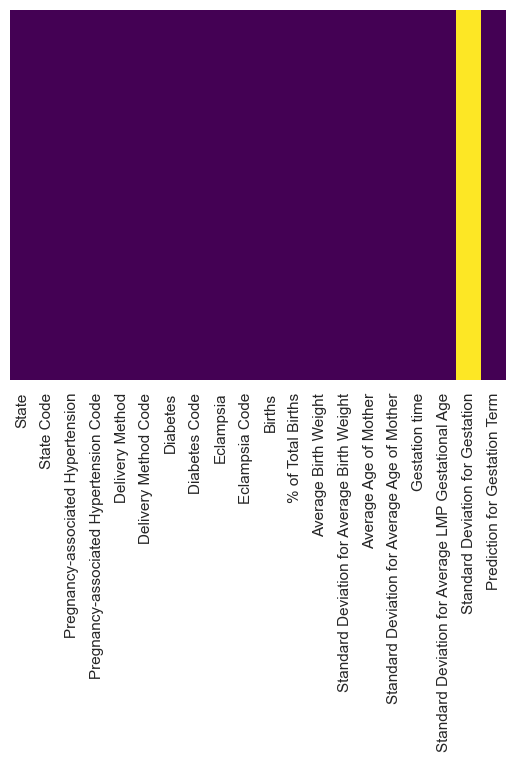

In [14]:
##This is difficult to see here how many values are true or false
##Using Visualisation concept
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Gestation time'>

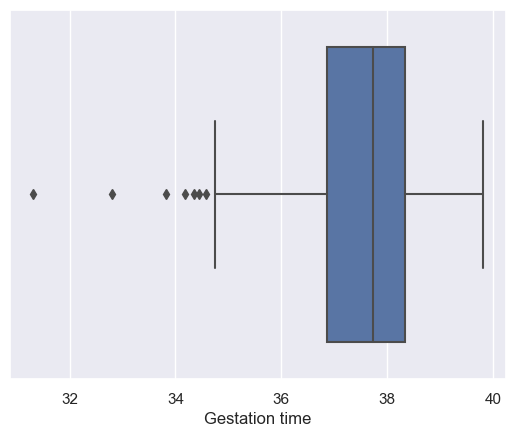

In [15]:
sns.boxplot(x=df['Gestation time'])

**Since the median is closer to the right of the box plot, the distribution is left skewed, i.e the late term is very less compared to the Early trm and full term gestation period**

In [16]:
def plot_hist(variable):
    plt.figure(figsize = (9,6))
    plt.hist(df[variable], bins=5)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

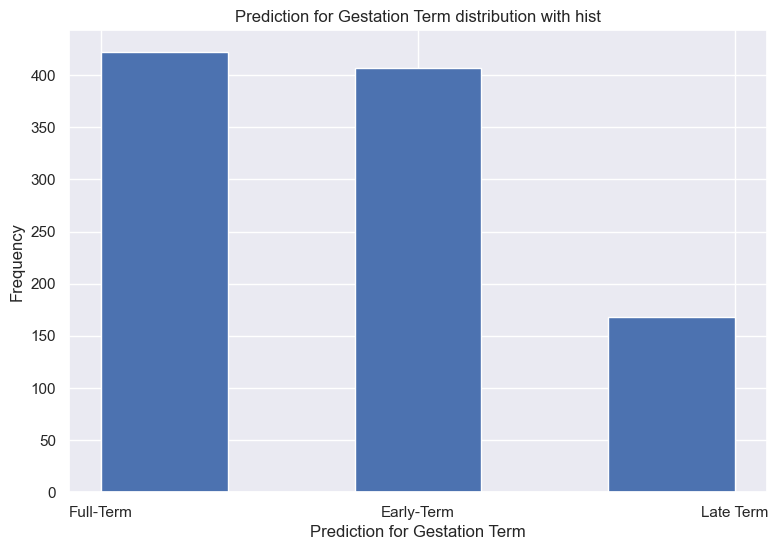

In [17]:
numericVariables = ["Prediction for Gestation Term"] 
for i in numericVariables:
    plot_hist(i)

In [18]:
def scatter_plot(x1,y1):
    df.plot.scatter(x=x1,y=y1)
    plt.title(x1 + " vs " + y1 +" Graph")
    plt.xlabel(x1)
    plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


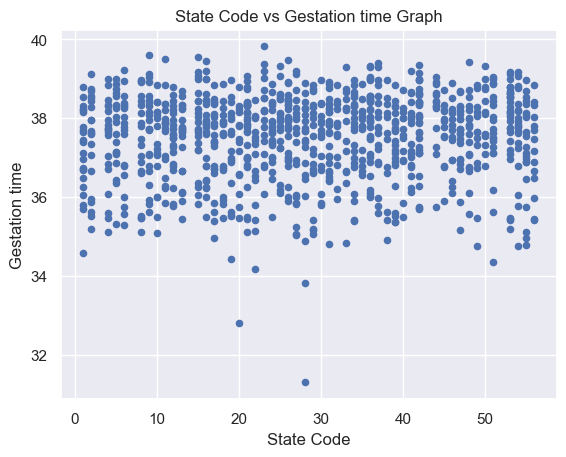

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


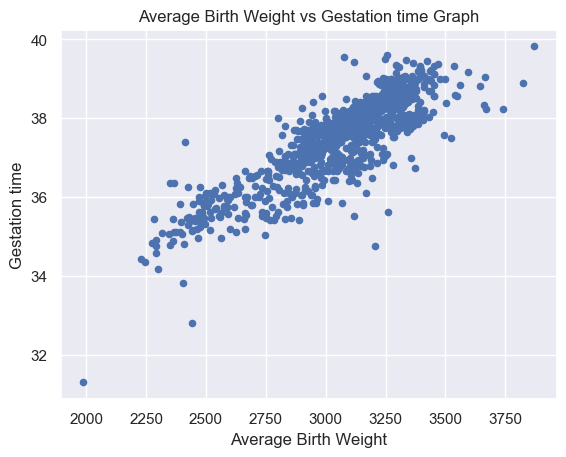

In [19]:
Variables = ["State Code","Average Birth Weight"] 
for i in Variables:
    scatter_plot(i,"Gestation time")

In [20]:
df.corr()

,State Code,Pregnancy-associated Hypertension Code,Delivery Method Code,Diabetes Code,Eclampsia Code,Births,Average Birth Weight,Standard Deviation for Average Birth Weight,Average Age of Mother,Standard Deviation for Average Age of Mother,Gestation time,Standard Deviation for Average LMP Gestational Age,Standard Deviation for Gestation
State Code,1.000000,0.018514,-0.013342,0.013586,0.113958,-0.009248,0.071426,-0.048422,-0.005853,-0.111346,0.062132,-0.055824,NaN
Pregnancy-associated Hypertension Code,0.018514,1.000000,0.150128,0.961507,0.666568,-0.045633,0.091110,0.040476,-0.153659,-0.011486,0.130087,0.279663,NaN
Delivery Method Code,-0.013342,0.150128,1.000000,0.151809,0.115118,-0.101146,0.200832,0.014447,0.013476,-0.076458,0.168011,0.005460,NaN
Diabetes Code,0.013586,0.961507,0.151809,1.000000,0.669212,-0.044811,0.000220,0.053346,-0.273485,0.016694,0.102586,0.317522,NaN
Eclampsia Code,0.113958,0.666568,0.115118,0.669212,1.000000,-0.047405,0.219525,-0.035596,-0.134077,-0.067870,0.235994,0.121932,NaN
Births,-0.009248,-0.045633,-0.101146,-0.044811,-0.047405,1.000000,0.166875,-0.181859,-0.088304,-0.053692,0.229161,-0.119646,NaN
Average Birth Weight,0.071426,0.091110,0.200832,0.000220,0.219525,0.166875,1.000000,-0.616997,0.136049,-0.340076,0.857208,-0.620860,NaN
Standard Deviation for Average Birth Weight,-0.048422,0.040476,0.014447,0.053346,-0.035596,-0.181859,-0.616997,1.000000,0.181285,0.259183,-0.744132,0.707705,NaN
Average Age of Mother,-0.005853,-0.153659,0.013476,-0.273485,-0.134077,-0.088304,0.136049,0.181285,1.000000,-0.023272,-0.073526,-0.096716,NaN
Standard Deviation for Average Age of Mother,-0.111346,-0.011486,-0.076458,0.016694,-0.067870,-0.053692,-0.340076,0.259183,-0.023272,1.000000,-0.257541,0.279740,NaN


<AxesSubplot:>

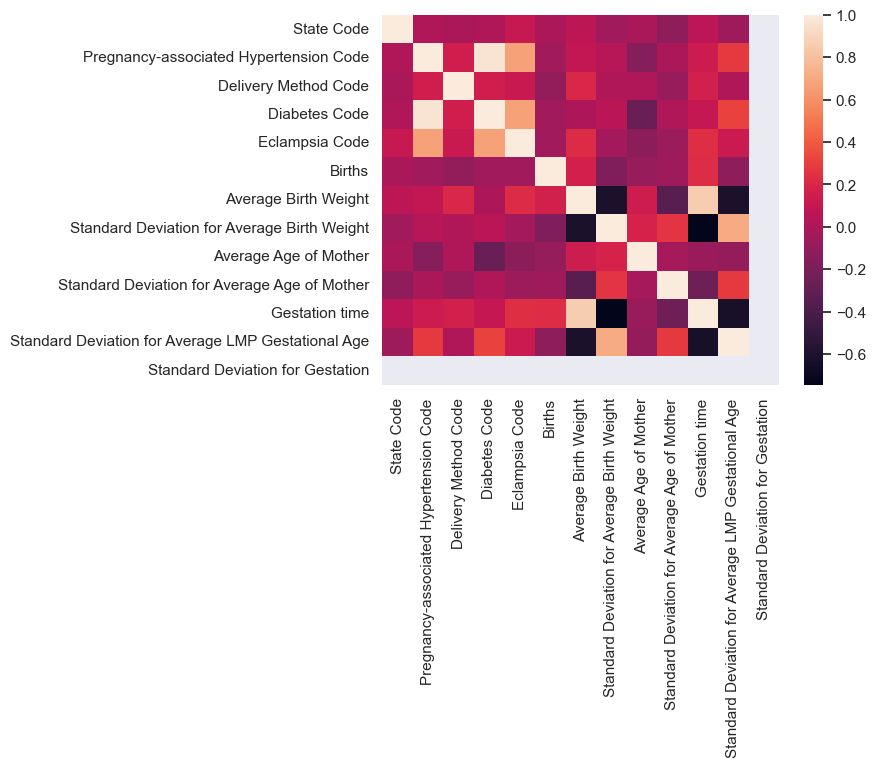

In [21]:
sns.heatmap(df.corr())